#Start

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import

In [32]:
#For the system
import os

#Manage of time
from datetime import datetime, timedelta
from pytz import timezone
import time

#Manage of files
import pandas as pd
import csv
import numpy as np

#Graph tools
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Info

In [3]:
%cd 'drive/My Drive/Colab Notebooks/COVID/Data'
!ls

/content/drive/My Drive/Colab Notebooks/COVID/Data
covid_19_data.csv		    time_series_covid_19_confirmed_US.csv
COVID19_line_list_data.csv	    time_series_covid_19_deaths.csv
COVID19_open_line_list.csv	    time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


In [16]:
df = pd.read_csv('covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [25]:
df = df[['ObservationDate',
         'Country/Region',
         'Confirmed',
         'Deaths',
         'Recovered']]
df_time = df.groupby('ObservationDate').mean()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,14.605263,0.447368,0.736842
2020-01-23,14.195652,0.391304,0.652174
2020-01-24,22.951220,0.634146,0.878049
2020-01-25,32.681818,0.954545,0.886364
2020-01-26,45.063830,1.191489,1.106383
...,...,...,...
2020-08-08,26430.021534,978.170929,16068.787349
2020-08-09,26731.740242,984.288022,16306.628533
2020-08-10,27038.524899,990.835801,16528.290713


ValueError: ignored

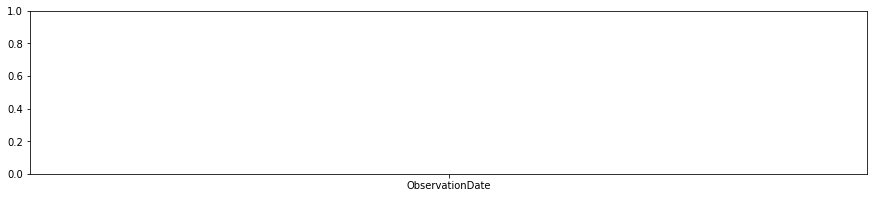

In [37]:
df_time = df.groupby('ObservationDate').median()
df_time

#plot
plt.figure(figsize=(15,3))
plt.plot('ObservationDate', 'Confirmed', data=df_time, color='r')
plt.plot('ObservationDate', 'Deaths', data=df_time, color='k')
plt.plot('ObservationDate', 'Recovered', data=df_time, color='g')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)

plt.show()

ValueError: ignored

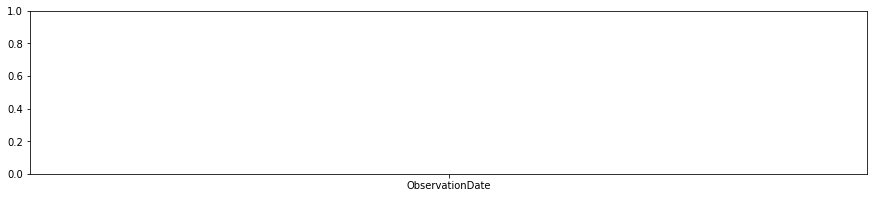

In [36]:
df_time_sum = df.groupby('ObservationDate').sum()

#plot
plt.figure(figsize=(15,3))
plt.plot('ObservationDate', 'Confirmed', data=df_time_sum, color='r')
plt.plot('ObservationDate', 'Deaths', data=df_time_sum, color='k')
plt.plot('ObservationDate', 'Recovered', data=df_time_sum, color='g')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [63]:
start_day = datetime(year=2020, month=1, day=22)
end_day = datetime(year=2020, month=8, day=12)
days = end_day - start_day
days.days

203

In [42]:
dates = df['ObservationDate'].to_list()
confirmed = df['Confirmed'].to_list()
deaths = df['Deaths'].to_list()
recovered = df['Recovered'].to_list()

print(len(dates))
print(len(confirmed))
print(len(deaths))
print(len(recovered))

85638
85638
85638
85638


In [102]:
list_days = [start_day + timedelta(days=x) for x in range(days.days + 1)]


reference = [x for x in range(days.days + 1)]


date_dict = dict(zip(list_days, reference))

sum_confirmed = [0] *len(reference)
sum_deaths = [0] *len(reference)
sum_recovered = [0] *len(reference)

plus = 0
for d in range(len(list_days)):

    while dates[plus] == list_days[d] and (d + plus) < len(dates):
        sum_confirmed[d] = int(sum_confirmed[d]) + int(confirmed[d + plus])
        # print(d, sum_confirmed[d], confirmed[d + plus])
        sum_deaths[d] = int(sum_deaths[d]) + int(deaths[d + plus])
        sum_recovered[d] = int(sum_recovered[d]) + int(recovered[d + plus])
        plus += 1

print( 'ObservationDate | Confirmed | deaths | recovered')
for d in range(len(list_days)):
    print(list_days[d], sum_confirmed[d], sum_deaths[d], sum_recovered[d])

ObservationDate | Confirmed | deaths | recovered
2020-01-22 00:00:00 555 17 28
2020-01-23 00:00:00 1193 42 61
2020-01-24 00:00:00 1178 42 37
2020-01-25 00:00:00 1810 54 49
2020-01-26 00:00:00 2592 80 57
2020-01-27 00:00:00 5232 131 98
2020-01-28 00:00:00 5907 132 119
2020-01-29 00:00:00 7934 170 137
2020-01-30 00:00:00 9603 213 209
2020-01-31 00:00:00 11724 260 272
2020-02-01 00:00:00 16563 361 459
2020-02-02 00:00:00 19669 426 612
2020-02-03 00:00:00 23694 491 834
2020-02-04 00:00:00 27462 562 1086
2020-02-05 00:00:00 30638 636 1454
2020-02-06 00:00:00 34248 717 1969
2020-02-07 00:00:00 36999 806 2578
2020-02-08 00:00:00 40074 903 3214
2020-02-09 00:00:00 42623 1013 3932
2020-02-10 00:00:00 44727 1112 4617
2020-02-11 00:00:00 45163 1117 5076
2020-02-12 00:00:00 60330 1368 6245
2020-02-13 00:00:00 66858 1523 8035
2020-02-14 00:00:00 68994 1665 9344
2020-02-15 00:00:00 71195 1769 10828
2020-02-16 00:00:00 73236 1868 12562
2020-02-17 00:00:00 75121 2007 14316
2020-02-18 00:00:00 75621 21